In [50]:
# import libraries
import os
import re
import sys
# import cv2
from multi_bary_plot import GenBary
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation, PillowWriter
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
# import the 'branching process' modules
import sys
sys.path.append("../branching_model/")
from branching_model.Agent import * 

In [4]:
phenotypes_df = pd.read_csv('../data/simulations_recordings/cell_phenotypes.csv', sep = ',')
phenotypes_df = phenotypes_df.copy().rename(columns = {'susceptible' : 'S'})
print(len(phenotypes_df['agent_id'].unique()))
# print(len(phenotypes_df))
phenotypes_df.head()

3650


,timestep,agent_id,n_cells,S,R1,R2,R3
0,1,0,1,0.305466,0.217228,0.265272,0.212034
1,2,0,1,0.305791,0.217104,0.265195,0.211911
2,3,0,1,0.306116,0.216979,0.265117,0.211788
3,4,0,1,0.306442,0.216854,0.265039,0.211665
4,5,0,1,0.306768,0.216729,0.264961,0.211542


In [39]:
# plot
barycentric_df = phenotypes_df[phenotypes_df['timestep'] ==100]
barycentric_df = barycentric_df.copy().loc[:, ['agent_id', 'S', 'R1', 'R2', 'R3']]
print(len(barycentric_df))
barycentric_df.head()

4


,agent_id,S,R1,R2,R3
205,0,0.339780,0.204250,0.256590,0.199380
206,1,0.413479,0.153711,0.180190,0.252620
207,2,0.216563,0.138124,0.062559,0.582754
208,3,0.436868,0.191704,0.162226,0.209202


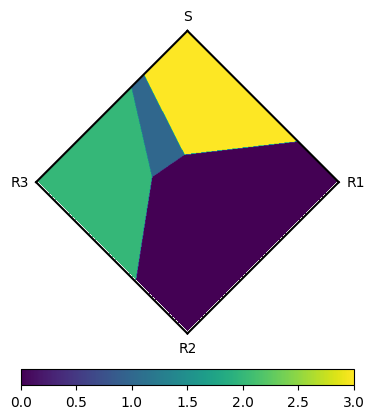

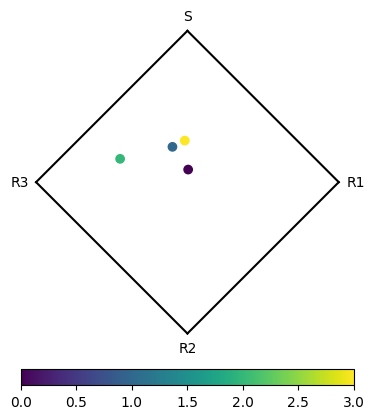

In [41]:
# test plotting 1
phenotypes_bp = GenBary(barycentric_df, 'agent_id')
fig, ax, im = phenotypes_bp.imshow()
fig, ax, ic = phenotypes_bp.scatter()

Plotting barycentric plot for timestep 1


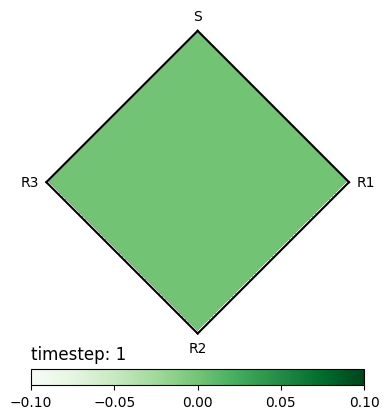

Plotting barycentric plot for timestep 100


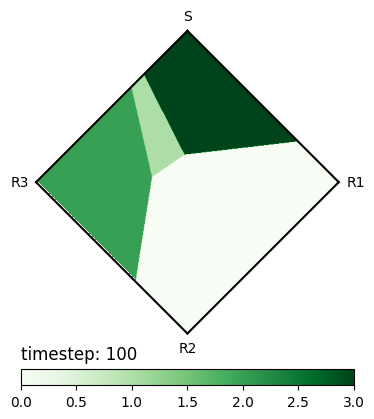

Plotting barycentric plot for timestep 200


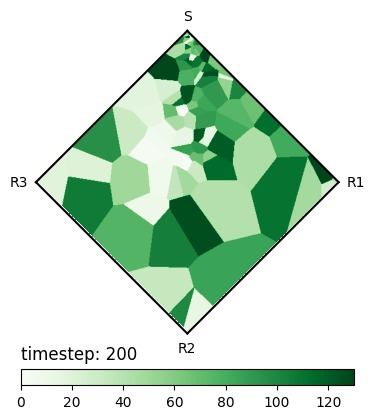

Plotting barycentric plot for timestep 300


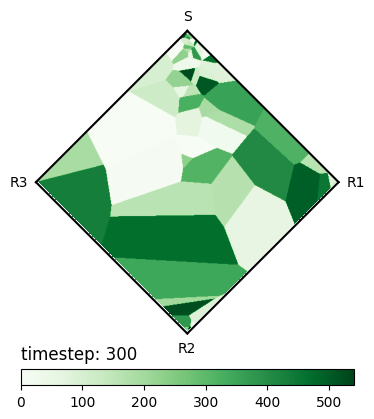

Plotting barycentric plot for timestep 400


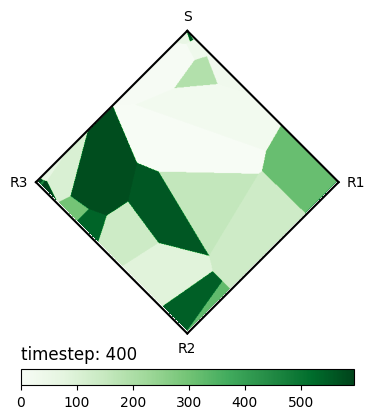

Plotting barycentric plot for timestep 500


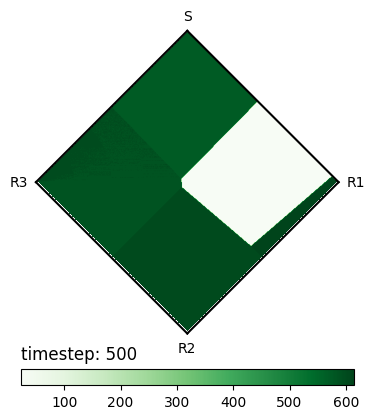

Plotting barycentric plot for timestep 600


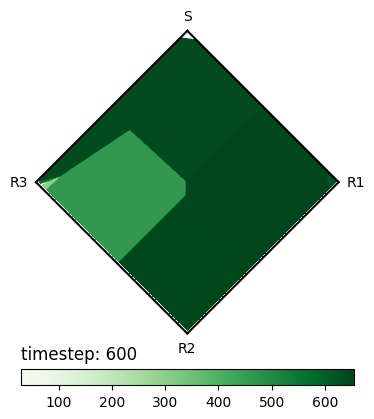

Plotting barycentric plot for timestep 700


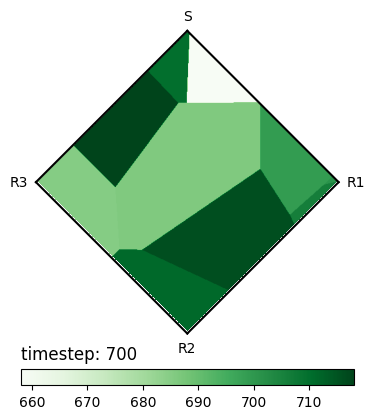

Plotting barycentric plot for timestep 800


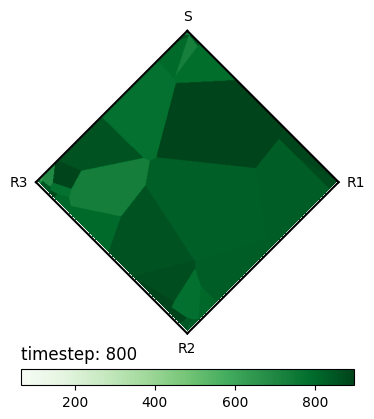

Plotting barycentric plot for timestep 900


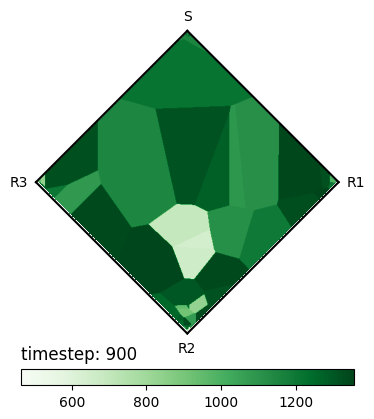

Plotting barycentric plot for timestep 1000


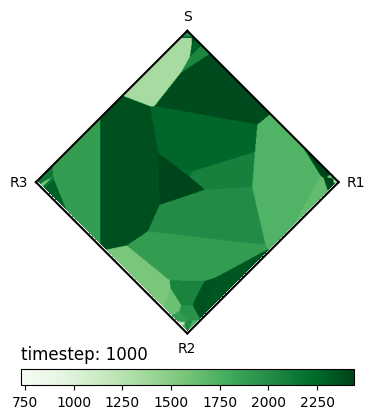

In [14]:
#plot all multiple timestes

# Create a folder to store the plots
output_folder = "barycentric_plots"
os.makedirs(output_folder, exist_ok=True)
# os.chdir(output_folder)

# Define the specific time intervals to plot
# we want to plot starting with timestep 1, then every 100 timestep
timestep_intervals = [1] + list(range(100, max(phenotypes_df['timestep']) + 1, 100))

# Define a green color palette (to match TeamGreen color scheme)
green_palette = plt.get_cmap('Greens')

# Loop through the specified time intervals and create the barycentric plots
for timestep in timestep_intervals:
    barycentric_df = phenotypes_df[phenotypes_df['timestep'] == timestep] # filtering timesteps
    barycentric_df = barycentric_df.copy().loc[:, ['agent_id', 'S', 'R1', 'R2', 'R3']] #subsetting for the 4 cols we need
    
    # print statement for which timesteps we are plotting
    print(f"Plotting barycentric plot for timestep {timestep}")
    
    # Create and display the barycentric plots
    phenotypes_bp = GenBary(barycentric_df, 'agent_id')
    fig, ax, im = phenotypes_bp.imshow(cmap = green_palette)  # Use the green color palette
    
    # Title for the plot
    plt.title(f'timestep: {timestep}', loc='left', y=1.05)
    
    # Save the plot as an image in the output folder
    plot_filename = os.path.join(output_folder, f'barycentric_plot_{timestep}.png')
    plt.savefig(plot_filename)
    
    # Display the plot (optional)
    plt.show()

    # Close the current plot to release resources
    plt.close()

Plotting barycentric scatter plot for timestep 1


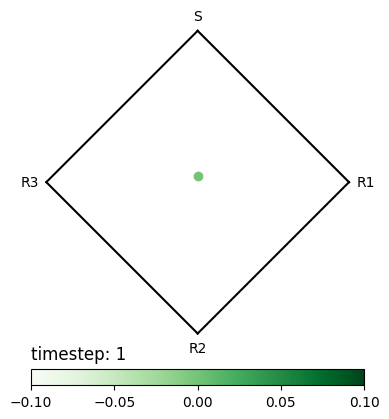

Plotting barycentric scatter plot for timestep 100


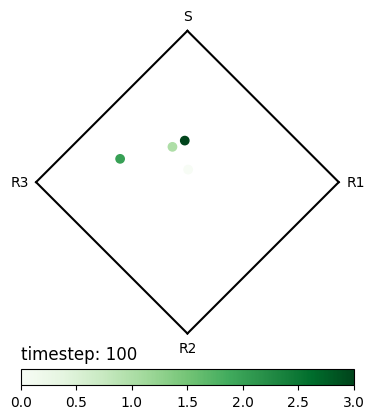

Plotting barycentric scatter plot for timestep 200


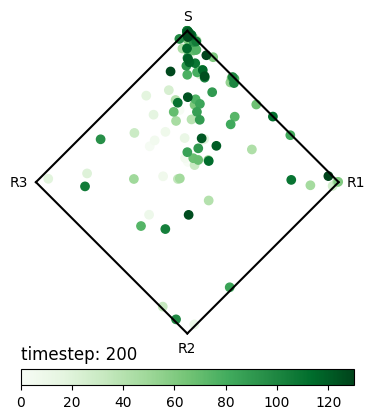

Plotting barycentric scatter plot for timestep 300


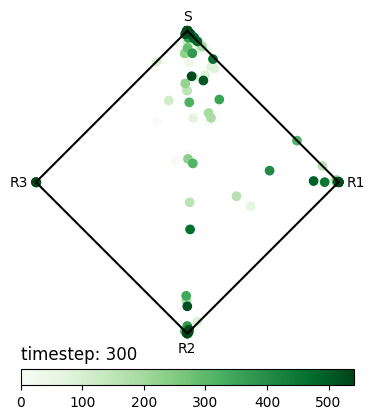

Plotting barycentric scatter plot for timestep 400


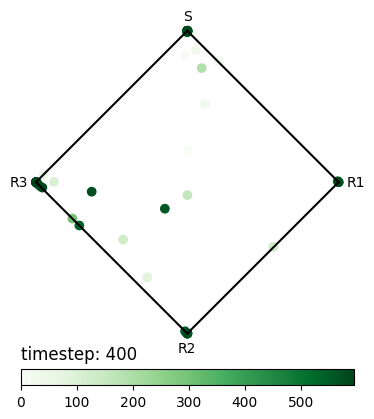

Plotting barycentric scatter plot for timestep 500


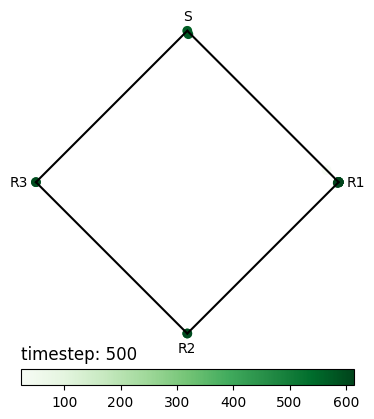

Plotting barycentric scatter plot for timestep 600


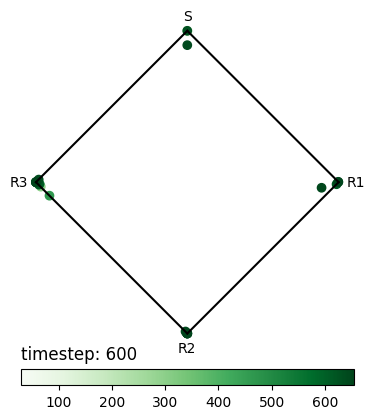

Plotting barycentric scatter plot for timestep 700


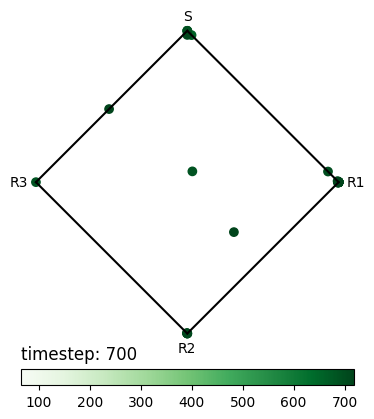

Plotting barycentric scatter plot for timestep 800


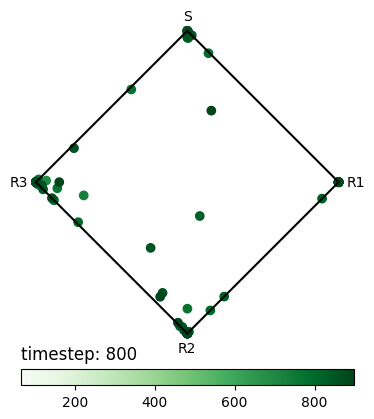

Plotting barycentric scatter plot for timestep 900


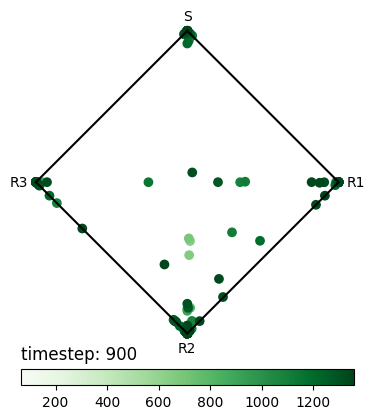

Plotting barycentric scatter plot for timestep 1000


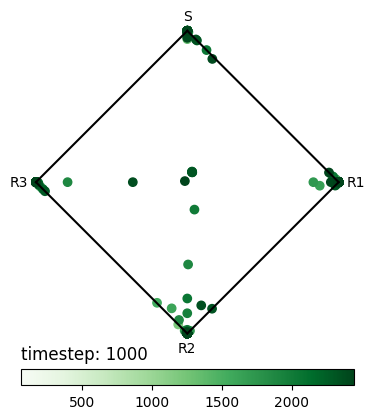

In [21]:
# scatter barycentric
import os

# Create a folder to store the plots
output_folder = "barycentric_plots"
os.makedirs(output_folder, exist_ok=True)
# os.chdir(output_folder)

# Define the specific time intervals to plot
plot_intervals = [1] + list(range(100, max(phenotypes_df['timestep']) + 1, 100))

# Define a green color palette
green_palette = plt.get_cmap('Greens')

# Loop through the specified time intervals and create barycentric plots
for timestep in plot_intervals:
    barycentric_df = phenotypes_df[phenotypes_df['timestep'] == timestep]
    barycentric_df = barycentric_df.copy().loc[:, ['agent_id', 'S', 'R1', 'R2', 'R3']]
    
    print(f"Plotting barycentric scatter plot for timestep {timestep}")
    
    # Create and display the barycentric plot
    phenotypes_bp = GenBary(barycentric_df, 'agent_id')
    fig, ax, im = phenotypes_bp.scatter(cmap=green_palette)  # Use the green color palette
    
    # Title for the plot
    plt.title(f'timestep: {timestep}', loc='left', y=1.05)
    
    # Save the plot as an image in the output folder
    plot_filename = os.path.join(output_folder, f'scatter_barycentric_plot_{timestep}.png')
    plt.savefig(plot_filename)
    
    # Display the plot (optional)
    plt.show()

    # Close the current plot to release resources
    plt.close()

# create animated plot
## animated barycentric plots of phenotypes 'S', 'R1, 'R2', 'R3' at each timepoint


MovieWriter imagemagick unavailable; using Pillow instead.


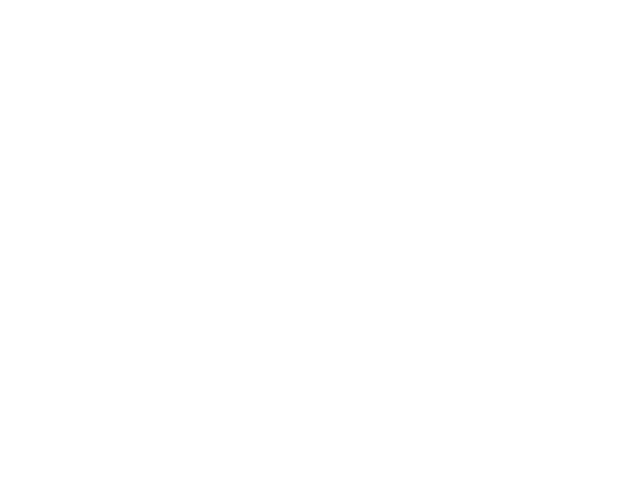

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

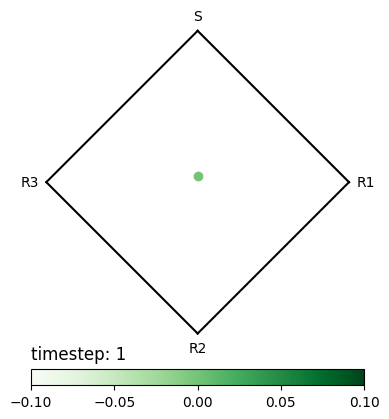

In [49]:
# create animated plot
# # animated barycentric plots of phenotypes 'S', 'R1, 'R2', 'R3' at each timepoint

# Define the specific time intervals to plot
plot_intervals = [1] + list(range(100, max(phenotypes_df['timestep']) + 1, 100))

# Define a green color palette
green_palette = plt.get_cmap('Greens')

# Create a function to update the scatter plot at each time step
def update(timestep:int):
    plt.clf()
    barycentric_df = phenotypes_df[phenotypes_df['timestep'] == timestep]
    barycentric_df = barycentric_df.copy().loc[:, ['agent_id', 'S', 'R1', 'R2', 'R3']]
    
    # Create and display the barycentric plot
    phenotypes_bp = GenBary(barycentric_df, 'agent_id')
    fig, ax, im = phenotypes_bp.scatter(cmap=green_palette)  # Use the green color palette

    # Title for the plot
    plt.title(f'timestep: {timestep}', loc='left', y=1.05)

# Create a figure and use FuncAnimation to generate the animation
fig, ax = plt.subplots()
ani = animation.FuncAnimation(
    fig,
    update,
    # frames = plot_intervals,
    frames=range(1, len(treatments_by_timepoint), animate_every_n_timesteps),
    repeat = False
    )

# Save the animation as a 'gif'
ani.save('animated_barycentric_plot.gif', writer='imagemagick', fps=10)
plt.close()

# show the gif
from IPython.display import Image

Image("./animated_barycentric_plot.gif")

In [64]:
# list(range(100, max(phenotypes_df['timestep']) + 1, 100))
# print(range(100, max(phenotypes_df['timestep'])))
print(range(1, len(phenotypes_df['timestep']), 1))

range(1, 5)
